# Imports

In [1]:
# Basics
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read data
enroll = pd.read_csv('18_19_enrollment.csv')
enroll.head()

,student_id,school_name,grade_level_2019
0,13898,School G,1
1,27795,School G,1
2,22938,School E,1
3,22431,School F,1
4,18048,School E,1


In [3]:
enroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   student_id        2788 non-null   int64 
 1   school_name       2788 non-null   object
 2   grade_level_2019  2788 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 65.5+ KB


In [4]:
#
map_scores = pd.read_csv('MAP_scores.csv')
map_scores.head()

,student_id,year,map_term,subject,rit_score,percentile,quartile,typical_fall_to_spring_growth
0,13898,2019,Fall,Reading,161,59,3,18
1,27795,2019,Fall,Reading,158,50,3,19
2,22938,2019,Fall,Reading,162,62,3,18
3,22431,2019,Fall,Reading,162,62,3,18
4,18048,2019,Fall,Reading,166,73,3,17


In [5]:
map_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   student_id                     11118 non-null  int64 
 1   year                           11118 non-null  int64 
 2   map_term                       11118 non-null  object
 3   subject                        11118 non-null  object
 4   rit_score                      11118 non-null  object
 5   percentile                     11118 non-null  object
 6   quartile                       11118 non-null  object
 7   typical_fall_to_spring_growth  11118 non-null  object
dtypes: int64(2), object(6)
memory usage: 695.0+ KB


In [6]:
spec_prog = pd.read_csv('special_programs.csv')
spec_prog.head()

,student_id,program_name
0,13898,SPED
1,27795,SPED
2,22938,.
3,22431,.
4,18048,.


In [7]:
spec_prog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   student_id    2787 non-null   int64 
 1   program_name  2784 non-null   object
dtypes: int64(1), object(1)
memory usage: 43.7+ KB


In [8]:
almost_df = enroll.merge(map_scores, how='right', left_on='student_id', right_on='student_id')
almost_df.head()

,student_id,school_name,grade_level_2019,year,map_term,subject,rit_score,percentile,quartile,typical_fall_to_spring_growth
0,13898,School G,1,2019,Fall,Reading,161,59,3,18
1,27795,School G,1,2019,Fall,Reading,158,50,3,19
2,22938,School E,1,2019,Fall,Reading,162,62,3,18
3,22431,School F,1,2019,Fall,Reading,162,62,3,18
4,18048,School E,1,2019,Fall,Reading,166,73,3,17


In [9]:
df = almost_df.merge(spec_prog, how='right', left_on='student_id', right_on='student_id')

In [10]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11122 entries, 0 to 11121
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   student_id                     11122 non-null  int64 
 1   school_name                    11122 non-null  object
 2   grade_level_2019               11122 non-null  int64 
 3   year                           11122 non-null  int64 
 4   map_term                       11122 non-null  object
 5   subject                        11122 non-null  object
 6   rit_score                      11122 non-null  object
 7   percentile                     11122 non-null  object
 8   quartile                       11122 non-null  object
 9   typical_fall_to_spring_growth  11122 non-null  object
 10  program_name                   11110 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.0+ MB


In [11]:
# student_id to obj - done
# grade_level_2019 to obj - done
# year to obj - done
# (review) rit_score to int - issue converting and needs investigation - 999 cases of ('.')
# (review) percentile to int - same as rit_score
df.shape

(11122, 11)

In [12]:
df.percentile.describe()

count     11122
unique      100
top           .
freq        999
Name: percentile, dtype: object

In [13]:
df['student_id'] = df['student_id'].astype(object)
df['grade_level_2019'] = df['grade_level_2019'].astype(object)
df['year'] = df['year'].astype(object)
# df['rit_score'] = df['rit_score'].astype(int)
# df['percentile'] = df['percentile'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11122 entries, 0 to 11121
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   student_id                     11122 non-null  object
 1   school_name                    11122 non-null  object
 2   grade_level_2019               11122 non-null  object
 3   year                           11122 non-null  object
 4   map_term                       11122 non-null  object
 5   subject                        11122 non-null  object
 6   rit_score                      11122 non-null  object
 7   percentile                     11122 non-null  object
 8   quartile                       11122 non-null  object
 9   typical_fall_to_spring_growth  11122 non-null  object
 10  program_name                   11110 non-null  object
dtypes: object(11)
memory usage: 1.0+ MB


In [14]:
# drop nulls
df = df.dropna()
df.shape

(11110, 11)

In [15]:
# check for causes or insights for rit_score = '.'
df[df.rit_score != '.'].shape

(10113, 11)

In [16]:
df[df.rit_score == '.'].grade_level_2019.value_counts()

6    242
8    181
7    166
5    102
2     94
1     89
3     63
0     53
4      7
Name: grade_level_2019, dtype: int64

In [17]:
# Decided it's worth dropping rows with a rit_score = '.'
df = df[df.rit_score != '.']

In [18]:
df['rit_score'] = df['rit_score'].astype(int)
df['percentile'] = df['percentile'].astype(int)
# df['typical_fall_to_spring_growth'] = df['typical_fall_to_spring_growth'].astype(int)
# ^ pressence of '.' values

In [19]:
df.head()

,student_id,school_name,grade_level_2019,year,map_term,subject,rit_score,percentile,quartile,typical_fall_to_spring_growth,program_name
0,13898,School G,1,2019,Fall,Reading,161,59,3,18,SPED
1,13898,School G,1,2019,Fall,Math,166,69,3,20,SPED
2,13898,School G,1,2019,Spring,Reading,175,43,2,.,SPED
3,13898,School G,1,2019,Spring,Math,186,65,3,.,SPED
4,27795,School G,1,2019,Fall,Reading,158,50,3,19,SPED


## Any other data prep to consider with time?

- Worth concatinating map_term and subject?
- Alter data so that each row contains all the data for 1 student_id
- Seperate by school
- Seperate by grade
- Seperate by term

## Visual Exploration

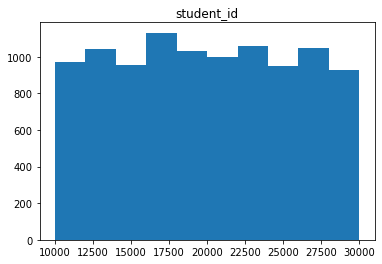

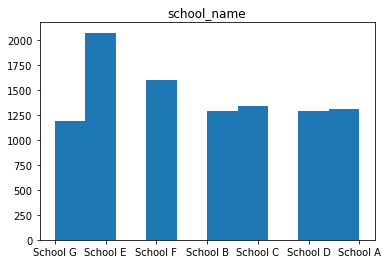

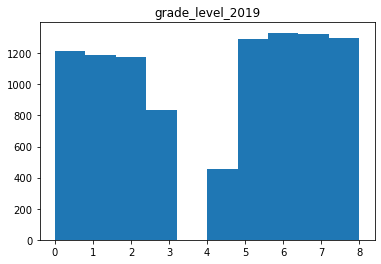

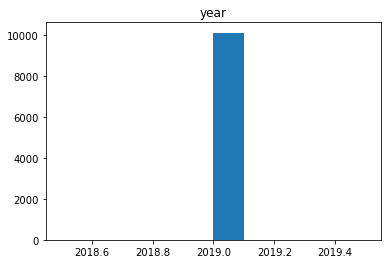

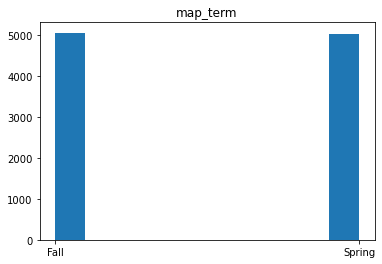

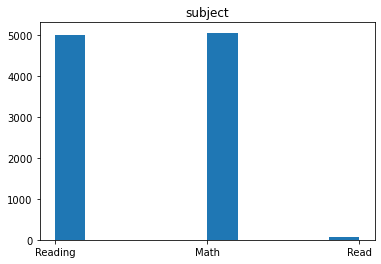

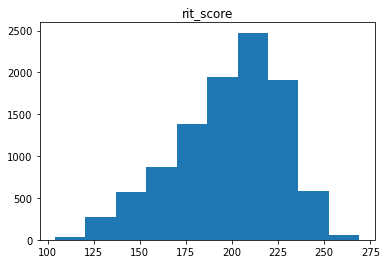

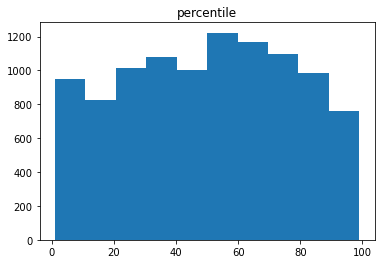

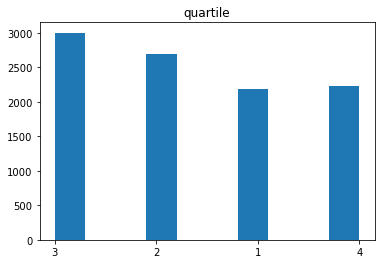

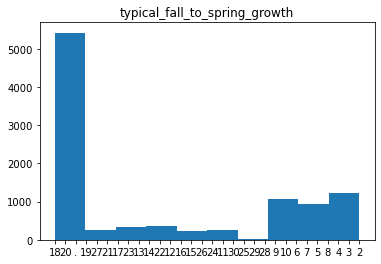

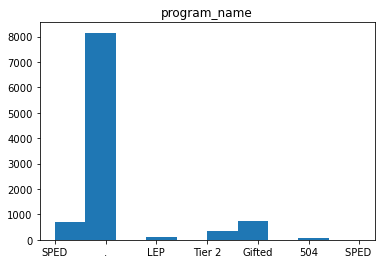

In [20]:
# Univariate distribution

for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

## Univariate Takaways
- School E has the largest student population
- 3rd and 4th grade seem either under represented, or just a smaller smaple size than the rest of the grades
- !! Subect has a few mislabled columns where instead of reading it says read.  Needs adjustment !!
- rit_score has a normal distribution
- Largest majority of students fall within the 3rd quartile, followed by 2nd, 4th, then 1st


- **Other Note: Schools G and F do not have information on their 4th grade students**

In [21]:
df.replace({'subject': {'Reading':'Reading', 'Read':'Reading', 'Math':'Math'}}, inplace=True)

In [22]:
df.subject.value_counts()

Reading    5065
Math       5048
Name: subject, dtype: int64

# Final Format

* Save to excel for Tableau Exploration
* Seperate by Spring/Fall
* Seperate by School

In [23]:
# create excel writer object
writer = pd.ExcelWriter('KIPP.xlsx')
# write dataframe to excel
df.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [24]:
# Term  Seperation
df[df['map_term'] == 'Fall'].head()

,student_id,school_name,grade_level_2019,year,map_term,subject,rit_score,percentile,quartile,typical_fall_to_spring_growth,program_name
0,13898,School G,1,2019,Fall,Reading,161,59,3,18,SPED
1,13898,School G,1,2019,Fall,Math,166,69,3,20,SPED
4,27795,School G,1,2019,Fall,Reading,158,50,3,19,SPED
5,27795,School G,1,2019,Fall,Math,135,4,1,27,SPED
8,22938,School E,1,2019,Fall,Reading,162,62,3,18,.


In [25]:
# Term DataFrames
fall = df[df['map_term'] == 'Fall']
spring = df[df['map_term'] == 'Spring']

In [26]:
# Save Fall
# create excel writer object
writer = pd.ExcelWriter('Fall.xlsx')
# write dataframe to excel
fall.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [27]:
# Save Spring
# create excel writer object
writer = pd.ExcelWriter('Spring.xlsx')
# write dataframe to excel
spring.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [28]:
# School DataFrames
school_a = df[df['school_name'] == 'School A']
school_b = df[df['school_name'] == 'School B']
school_c = df[df['school_name'] == 'School C']
school_d = df[df['school_name'] == 'School D']
school_e = df[df['school_name'] == 'School E']
school_f = df[df['school_name'] == 'School F']
school_g = df[df['school_name'] == 'School G']

In [29]:
# School A
# create excel writer object
writer = pd.ExcelWriter('School_A.xlsx')
# write dataframe to excel
school_a.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [30]:
# School B
# create excel writer object
writer = pd.ExcelWriter('School_B.xlsx')
# write dataframe to excel
school_b.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [31]:
# School C
# create excel writer object
writer = pd.ExcelWriter('School_C.xlsx')
# write dataframe to excel
school_c.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [32]:
# School D
# create excel writer object
writer = pd.ExcelWriter('School_D.xlsx')
# write dataframe to excel
school_d.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [33]:
# School E
# create excel writer object
writer = pd.ExcelWriter('School_E.xlsx')
# write dataframe to excel
school_e.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [34]:
# School F
# create excel writer object
writer = pd.ExcelWriter('School_F.xlsx')
# write dataframe to excel
school_f.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [35]:
# School G
# create excel writer object
writer = pd.ExcelWriter('School_G.xlsx')
# write dataframe to excel
school_g.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.
